In [1]:
import pandas as pd
import numpy as np
import new_lib as nl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pydataset import data

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_f = iris[['Sepal.Width', 'Petal.Width']]

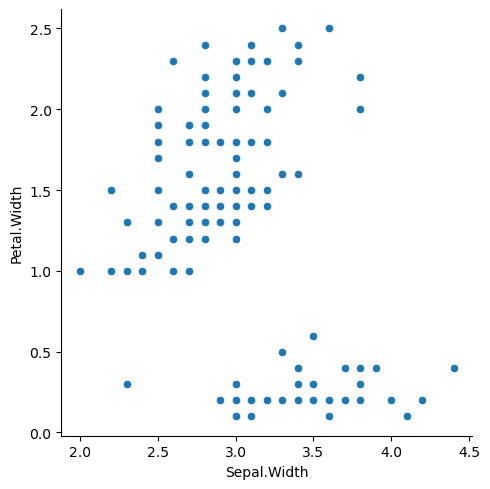

In [4]:
sns.relplot(data = iris_f, x = 'Sepal.Width', y = 'Petal.Width')

In [5]:
seed = 77
train, val_test = train_test_split(iris_f, train_size = .7, random_state = seed)

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_f)
kmeans.predict(iris_f)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
iris_f['unscaled_cluster'] = kmeans.predict(iris_f)


/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72449/3871715780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_f['unscaled_cluster'] = kmeans.predict(iris_f)


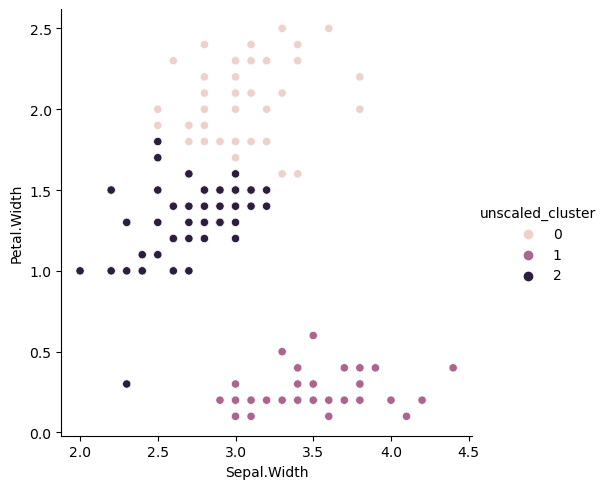

In [8]:
sns.relplot(data = iris_f, x = 'Sepal.Width', y = 'Petal.Width', hue = 'unscaled_cluster')
plt.show()

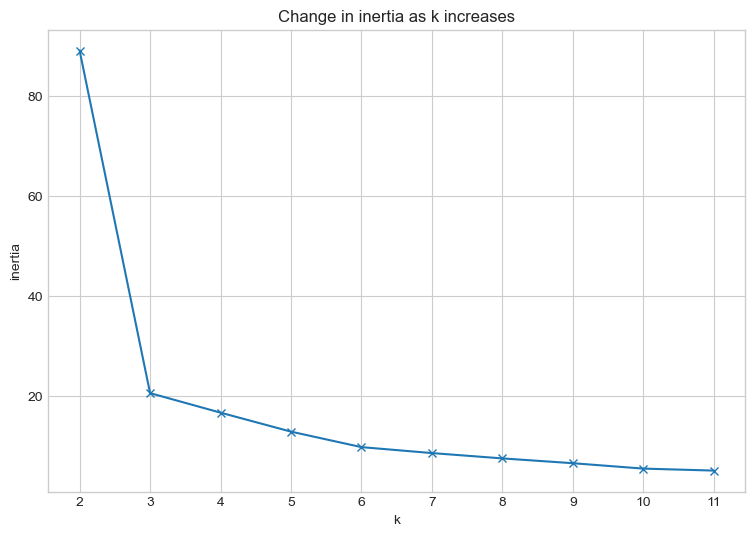

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(iris_f).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()

In [10]:
iris_m = iris[['Petal.Length', 'Petal.Width', 'Sepal.Width']]

In [11]:
seed = 77
train, val_test = train_test_split(iris_m, train_size = .7, random_state = seed)

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_m)
kmeans.predict(iris_m)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
iris_m['unscaled_cluster'] = kmeans.predict(iris_m)


/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72449/500762457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_m['unscaled_cluster'] = kmeans.predict(iris_m)


In [15]:
iris_m

,Petal.Length,Petal.Width,Sepal.Width,unscaled_cluster
1,1.4,0.2,3.5,1
2,1.4,0.2,3.0,1
3,1.3,0.2,3.2,1
4,1.5,0.2,3.1,1
5,1.4,0.2,3.6,1
6,1.7,0.4,3.9,1
7,1.4,0.3,3.4,1
8,1.5,0.2,3.4,1
9,1.4,0.2,2.9,1
10,1.5,0.1,3.1,1


In [16]:
url = nl.get_db_url('mall_customers')

In [17]:
query = '''SELECT * FROM customers'''

In [18]:
mall = pd.read_sql(query, url)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
mall_a = mall[['age', 'spending_score']]

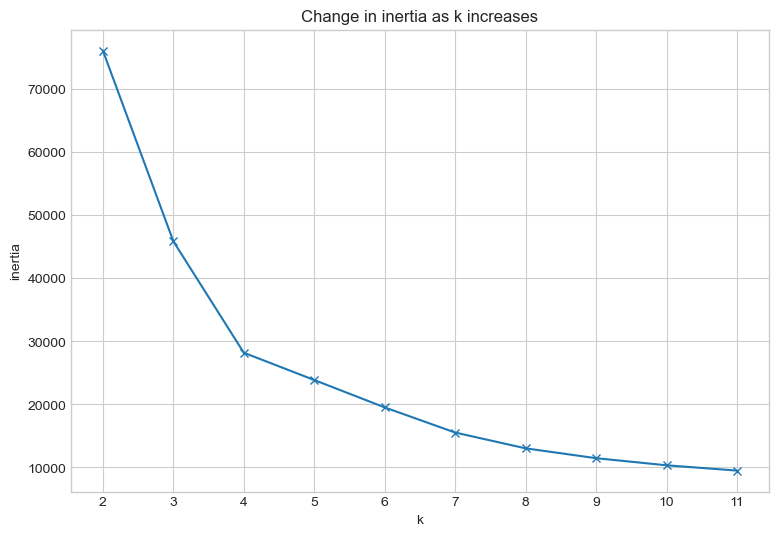

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(mall_a).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()

In [25]:
train, val_test = train_test_split(mall_a, train_size = .7, random_state = seed)

In [30]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(mall_a)
kmeans.predict(mall_a)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [31]:
mall_a['unscaled_cluster'] = kmeans.predict(mall_a)


/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72449/315091428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall_a['unscaled_cluster'] = kmeans.predict(mall_a)


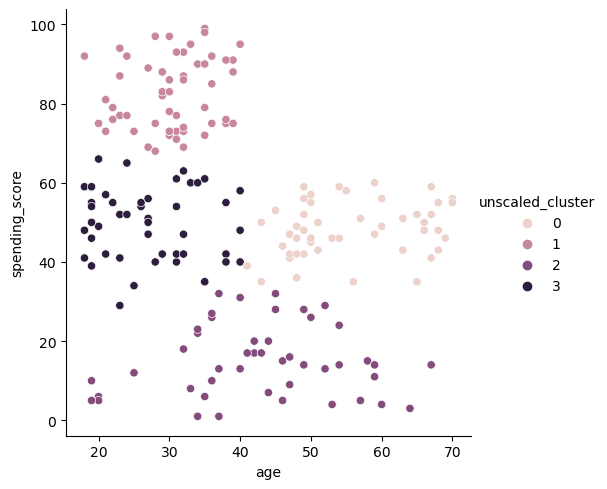

In [32]:
sns.relplot(data = mall_a, x = 'age', y = 'spending_score', hue = 'unscaled_cluster')
plt.show()

In [33]:
mm_scaler = MinMaxScaler()

In [34]:
mall_a[['age', 'spending_score']] = mm_scaler.fit_transform(mall_a[['age', 'spending_score']])

/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72449/567626881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall_a[['age', 'spending_score']] = mm_scaler.fit_transform(mall_a[['age', 'spending_score']])


In [35]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(mall_a)
kmeans.predict(mall_a)

array([1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 1, 2,
       3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 1,
       3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [36]:
mall_a['scaled_cluster'] = kmeans.predict(mall_a)


/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72449/1332716497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall_a['scaled_cluster'] = kmeans.predict(mall_a)


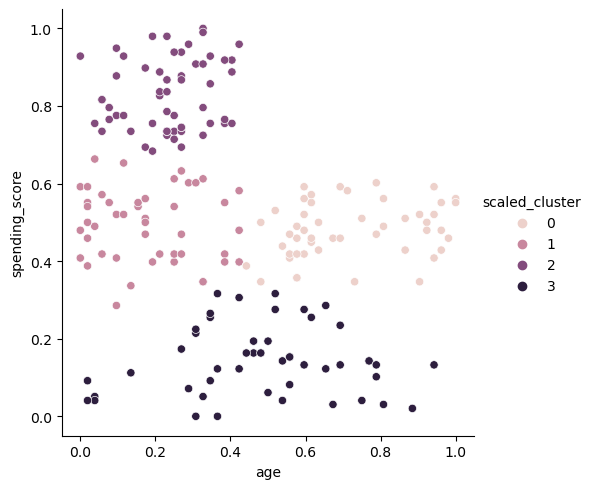

In [37]:
sns.relplot(data = mall_a, x = 'age', y = 'spending_score', hue = 'scaled_cluster')
plt.show()

## 3

- Scaling can change the cluster relationships

- Although not drastic here, if there are large discrepancies with the range of the data the model will weight the higher range as more important. This will result in potential shifts in the clusters